### Library import ###

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency


Reading the file

In [5]:
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [3]:
#what is in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

Comment:
No non-null vaues in any column
Correct data types
workable column names, so a clean dataset and it is ready for further analysis


### Descriptive Statistics

In [6]:
df.describe()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
#df_std = df.std()
#print(df_std) #entire column
#print(df['HighBP'].std()) #std os a specific column

#df_mean = df.mean()
#df_mean
#print(df['HighBP'].mean()) #mean os a specific column

Lets create 2 df separating people with diabetes and no diabetes


## Exploring the distribution of some columns ##

The distribution of the Gender throughout the dataset

In [47]:
df_no = df[df['Diabetes_binary'] == 0.0]
df_yes = df[df['Diabetes_binary'] == 1.0]

In [ ]:
#countplot with a hue, data = df
#fig = plt.figure(figsize=(15,10))
#ax = sns.countplot(data=df, x='Sex', hue='Diabetes_binary', palette='Set2')

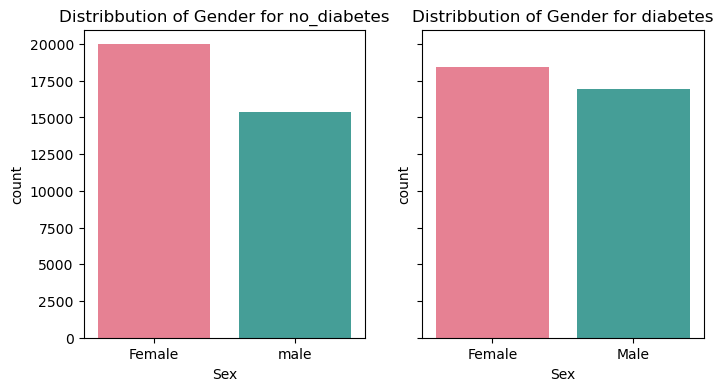

In [73]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey= True, figsize = (8,4))

ax1 = sns.countplot(data=df_no, x='Sex', ax=ax1, palette='husl')
ax1.set(title='Distribbution of Gender for no_diabetes')
ax1.set_xticklabels(['Female','male'])

ax2 = sns.countplot(data=df_yes, x='Sex', ax=ax2, palette='husl')
ax2.set(title='Distribbution of Gender for diabetes')
ax2.set_xticklabels(['Female','Male']) #Female = 0.0, male = 1.0

plt.show()



Observation: Both male and female are vulnarable to diabetes

data distribution of having stroke on the whole population

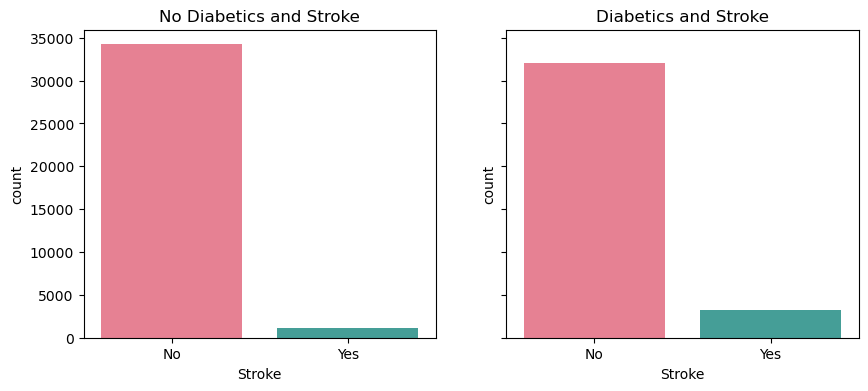

In [77]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey= True, figsize= (10,4))

ax1 = sns.countplot(data= df_no, x= 'Stroke', ax=ax1, palette='husl')
ax1.set(title='No Diabetics and Stroke')
ax1.set_xticklabels(['No', 'Yes'])

ax2 = sns.countplot(data= df_yes, x= 'Stroke', ax=ax2, palette='husl')
ax2.set(title='Diabetics and Stroke')
ax2.set_xticklabels(['No', 'Yes'])

plt.show()

Observation: Individuals with diabetes have an increased likelihood of experiencing strokes.
    

The distribution of the Age throughout the dataset

[Text(0, 0, '18-24'),
 Text(1, 0, '25-29'),
 Text(2, 0, '30-34'),
 Text(3, 0, '35-39'),
 Text(4, 0, '40-44'),
 Text(5, 0, '45-49'),
 Text(6, 0, '50-54'),
 Text(7, 0, '55-59'),
 Text(8, 0, '60-64'),
 Text(9, 0, '65-69'),
 Text(10, 0, '70-74'),
 Text(11, 0, '75-79'),
 Text(12, 0, '>80')]

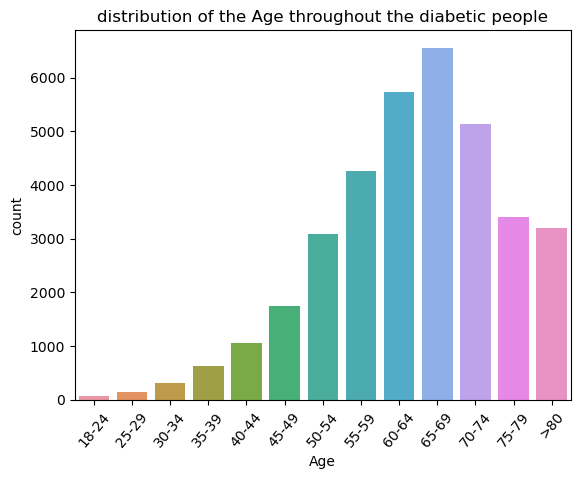

In [8]:
ax = sns.countplot(data = df_yes, x= 'Age')
ax.set(title='distribution of the Age throughout the diabetic people')
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'], rotation = 50)


Observation: Diabetes more likely to present among people age 40 and above. most affected by diabetes 60-64, 65-70, 70-74.

(15.0, 60.0)

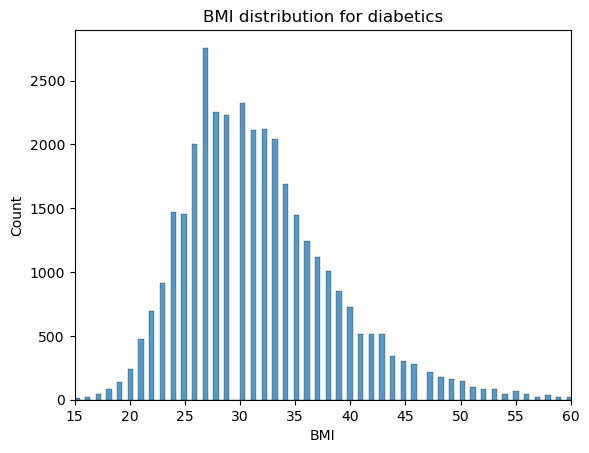

In [37]:
# Check BMI for people with diabetes. 
# We will remove outliers for better visualization, less than 15 and greater than 60.
ax = sns.histplot(data=df_yes, x='BMI')
ax.set(title='BMI distribution for diabetics')
plt.xlim(15, 60)


People with diabetes have higher BMI.

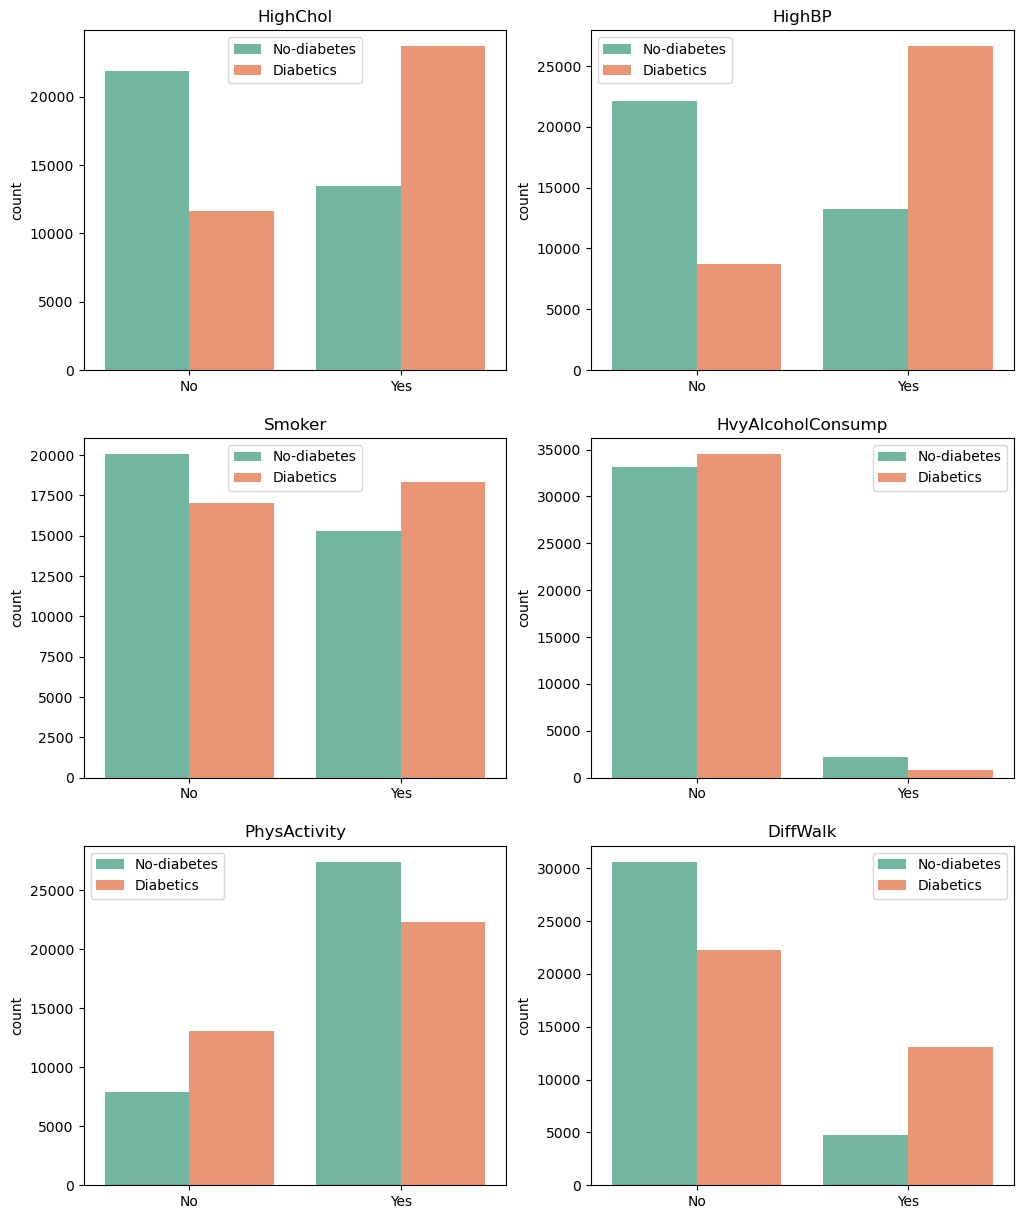

In [46]:
# There are some binary columns that we can visualy compare data between no-diabetes and diabetics.
# Lets iterate from those columns and build plots in one go.

col_names = ['HighChol', 'HighBP', 'Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'DiffWalk']
a = 3 #number of rows
b = 2 #number of columns
c = 1 #plot counter

fig = plt.figure(figsize=(12,15))
for i in col_names:
    plt.subplot(a, b, c)
    ax = sns.countplot(data=df, x=i, hue='Diabetes_binary', palette='Set2')
    ax.set(title = '{}'.format(i))
    ax.set(xlabel=None)
    ax.set_xticklabels(['No', 'Yes'])
    ax.legend(['No-diabetes', 'Diabetics'])
    c = c + 1
   

In [78]:
# Create a correlation matrix
corr_matrix = df.corr()
# Do some conditional formatting for better readability
cm = sns.light_palette("seagreen", as_cmap=True)
corr_matrix_style = corr_matrix.style.background_gradient(cmap = cm)
corr_matrix_style

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.381516,0.289213,0.115382,0.293373,0.085999,0.125427,0.211523,-0.158666,-0.054077,-0.079293,-0.094853,0.023191,0.040977,0.407612,0.087029,0.213081,0.272646,0.044413,0.278738,-0.170481,-0.224449
HighBP,0.381516,1.000000,0.316515,0.103283,0.241019,0.087438,0.129060,0.210750,-0.136102,-0.040852,-0.066624,-0.027030,0.035764,0.026517,0.320540,0.064294,0.173922,0.234784,0.040819,0.338132,-0.141643,-0.187657
HighChol,0.289213,0.316515,1.000000,0.085981,0.131309,0.093398,0.099786,0.181187,-0.090453,-0.047384,-0.042836,-0.025443,0.031532,0.033199,0.237778,0.083881,0.142610,0.162043,0.017324,0.240338,-0.084386,-0.107777
CholCheck,0.115382,0.103283,0.085981,1.000000,0.045648,-0.004331,0.022529,0.043497,-0.008249,0.017384,0.000349,-0.027146,0.106800,-0.062669,0.059213,-0.010660,0.034540,0.044430,-0.007991,0.101743,-0.008695,0.007550
BMI,0.293373,0.241019,0.131309,0.045648,1.000000,0.011551,0.022931,0.060355,-0.170936,-0.084505,-0.056528,-0.058232,-0.013417,0.065832,0.267888,0.104682,0.161862,0.246094,0.000827,-0.038648,-0.100233,-0.124878
Smoker,0.085999,0.087438,0.093398,-0.004331,0.011551,1.000000,0.064658,0.124418,-0.079823,-0.074811,-0.029926,0.077835,-0.012939,0.035799,0.152416,0.091257,0.120698,0.119789,0.112125,0.105424,-0.140966,-0.104725
Stroke,0.125427,0.129060,0.099786,0.022529,0.022931,0.064658,1.000000,0.223394,-0.079985,-0.008996,-0.047601,-0.023395,0.006484,0.036198,0.189447,0.087303,0.164488,0.192266,0.003822,0.123879,-0.073926,-0.136577
HeartDiseaseorAttack,0.211523,0.210750,0.181187,0.043497,0.060355,0.124418,0.223394,1.000000,-0.098223,-0.019436,-0.036315,-0.037130,0.015687,0.036029,0.275868,0.075057,0.198416,0.232611,0.098161,0.221878,-0.096559,-0.146748
PhysActivity,-0.158666,-0.136102,-0.090453,-0.008249,-0.170936,-0.079823,-0.079985,-0.098223,1.000000,0.133813,0.149322,0.019111,0.027089,-0.063302,-0.273548,-0.130090,-0.234500,-0.276868,0.051753,-0.100753,0.190271,0.196551
Fruits,-0.054077,-0.040852,-0.047384,0.017384,-0.084505,-0.074811,-0.008996,-0.019436,0.133813,1.000000,0.238605,-0.033246,0.029385,-0.045843,-0.098687,-0.062102,-0.048572,-0.050784,-0.088723,0.061096,0.098715,0.079009


<AxesSubplot:>

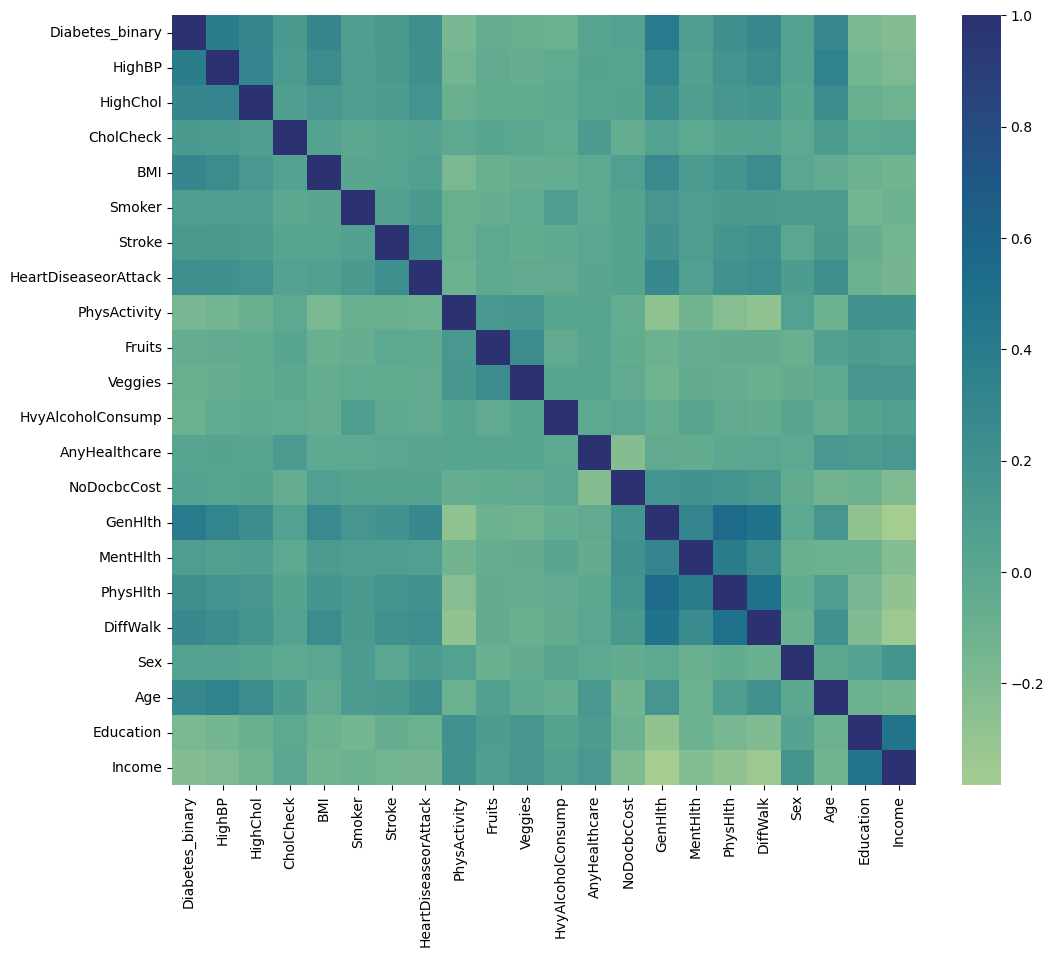

In [13]:
# Visualize relationship between all variables
plt.figure(figsize=(12,10))
sns.heatmap(data=corr_matrix, cmap='crest')

### Do no-diabetes and diabetics have the same number of poor physical health days per month?

### 1. Do no-diabetes and diabetics have the same BMI?



In [50]:
H0 = 'no-diabetes and diabetics have the same average BMI.'
H1 = 'no-diabetes and diabetics have different average BMI.'

# Creating data groups
df_no_BMI = random.sample(df_no['BMI'])
df_yes_BMI = df_yes['BMI']

# Print ratio of the variance of both data groups
print(np.var(df_no_BMI), np.var(df_yes_BMI))
ratio=  np.var(df_yes_BMI)/ np.var(df_no_BMI)
print(ratio)

38.285761991254965 54.21813492481208
1.4161435506284634


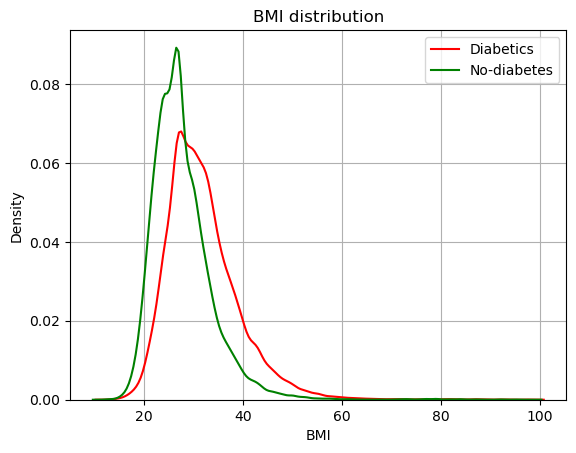

In [16]:
# Check visually how BMI distribution looks like
sns.kdeplot(df_yes_BMI,color='red')
sns.kdeplot(df_no_BMI,color='green')
plt.grid()
plt.title('BMI distribution')
plt.legend(['Diabetics', 'No-diabetes'])

In [53]:

ttest,p_value_1  = stats.ttest_ind(df_yes_BMI, df_no_BMI)
if p_value_1 < 0.05:   
    print('Reject Null Hypothesis -', H1)
else:
    print('Failed to reject Null Hypothesis -', h0)
print(p_value_1)

Reject Null Hypothesis - no-diabetes and diabetics have different average BMI.
0.0
